In [1]:
import sys
sys.path.append("..")  # Ensure project root is found

# Import configurations
from configs.plot_config import apply_plot_settings
from configs.math_functions import F
from configs.parameters import *
from configs.filenames import *

import numpy as np
import os

C = float(os.getenv("C", C))
sig = float(os.getenv("sig", sig))
itr = int(os.getenv("itr", itr))
E0 = int(os.getenv("E0", E0))
I0 = int(os.getenv("I0", I0))

print(f"📢 Using parameters: C={C}, sig={sig}, itr={itr}, E0={E0}, I0={I0}")

📢 Using parameters: C=0.01, sig=0.12, itr=20000, E0=0, I0=0


In [2]:
# Time array
t = np.linspace(0, (itr+1) * dt, itr+1)

# System state array
EI = np.zeros((2, itr+1))

EI[0, 0] = E0  # Set initial E value
EI[1, 0] = I0  # Set initial I value

# System dynamics simulation
for n in range(itr):
    F_E0 = F(EI[0, n - d])
    F_E1 = F(EI[1, n - d])

    EI[:, n + 1] = EI[:, n] + dt * np.array([
        -EI[0, n] + ie + wee * F_E0 - wei * F_E1,
        -EI[1, n] + ii + wie * F_E0 - wii * F_E1
    ])

# Extract results
EE, II = EI

# Save data in /data/
data = np.column_stack((t, EE, II))
output_dir = "../data/"
os.makedirs(output_dir, exist_ok=True)  # Ensure the directory exists

params = get_params_for_filename(param_keys, globals())
filename = get_filename("discrete", "WCM", **params)
savefile = os.path.join(output_dir, filename)
np.save(savefile, data, allow_pickle=True)

print(f"✅ Data saved to {savefile}")

✅ Data saved to ../data/WCM_DISCRETE_delay_itr=20000_dt=0.005_tau=1_wee=20_wei=21_wie=16_wii=6_ie=1.5_ii=-0.5_E0=0_I0=0.npy


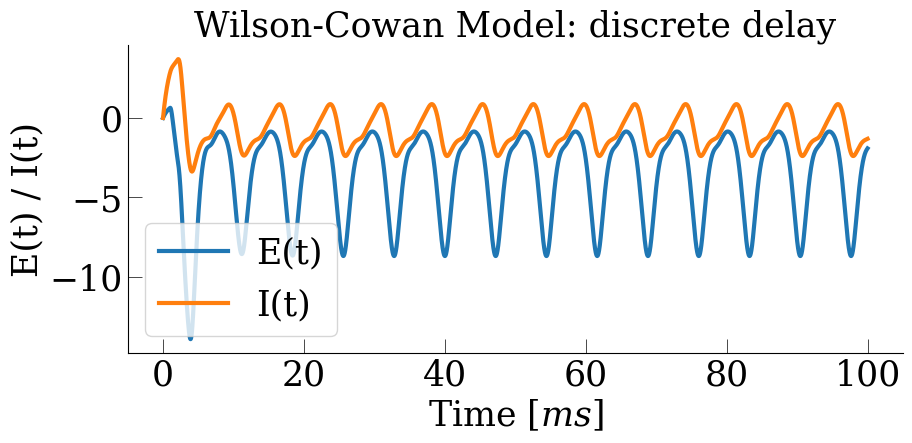

In [3]:
import matplotlib.pyplot as plt
from configs.plot_config import apply_plot_settings
apply_plot_settings()

data = np.load(savefile, allow_pickle=True)      
t, EE, II = data[:,0], data[:,1], data[:,2]

fig, ax = plt.subplots(figsize=(10, 4))  # Explicitly define figure size

ax.plot(t, EE, linewidth=3, label='E(t)')
ax.plot(t, II, linewidth=3, label='I(t)')
ax.set_xlabel('Time $[ms]$')
ax.set_ylabel('E(t) / I(t)')
ax.set_title('Wilson-Cowan Model: discrete delay')
ax.legend()

plt.show()